<img src="./resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2023, Day 3 </h1> 
<h3 align="center"> August 22, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> The Questions </h2>
    
<p> The first week of the course is devoted to question focused workshops and addresing those questions with datasets and computational methods that we will present.  Each day will be devoted to its own question.  
    
<p> For reference, the questions (as they are currently formulated) are
<ul>
<li> Day 1:  How do single neurons encode information about the external world?  
<li> Day 2:  How do populations of neurons encode information about the external world? 
<b><li> Day 3:  How do cell type and circuit architecture contribute to physiological function?</b>
<li> Day 4:  What is a behavioral state and how can we define it? 
<li> Day 5:  How does network structure lead to network dynamics?
</ul>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1> Can neuronal cell types be defined by their structural features? </h1>

Neurons are comprised of several projections called axons and dendrites. Dendritic projections are very diverse in morphological features, showing a diversity in several structural aspects such as the distributions of synaptic inputs, branching structure and shape and size of dendritic branches. The paper <a href = "https://www.biorxiv.org/content/10.1101/2023.01.23.525290v2"> Schneider-Mizell et al </a> describes in detail how excitatory cell types can be gleaned from the structural and positional properties of the cell.
 
<img src="./resources/F3_large.png"> 

<img src="./resources/neuron_structures.png">  

</div>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
In this tutorial, we will see if basic clustering methods coupled with dimensionality reduction methods can help us understand how dendritic structural features contribute to cell-type diversity. First, we will go through an overview of K-means clustering, our method of choice. Then, we will see how we can apply the clustering method to a set of pre-extracted features of excitatory cells from the MICrONS dataset. We will visualize how well the clustering methods work. 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Machine learning has many canonical problem types that we will discuss in these tutorials. These include Regression, Classification, Clustering, and Dimension Reduction. This tutorial is focused on <b> Clustering </b> .

<p>K-means clustering is an example of a unsupervised learning problem. It is automatic grouping of similiar objects into sets without using labels. In a clustering problem, we are given $N$ data points $\vec{x}_i$ where $i \in [1,N]$, where each data point is a d-dimensional real vextor. We want to partition the $N$ data points into $K (\leq N)$ sets $S = {S_1, S_2, ..., S_K}$ as to minizie the within-cluster sum of squares (i.e. variance). The objective is to find:
    
$\operatorname*{argmin}_S \sum_{i=1}^{K}\sum_{\vec{x} \in S_i} \| \vec{x} - \mu_i \|^2 = \operatorname*{argmin}_S \sum_{i=1}^{K} |S_i| Var S_i$
    
where $\mu_i$ is the mean (also called centroid) of the points in $S_i$, i.e.
    
$\mu_i = \frac{1}{|S_i|}\sum_{\vec{x}\in S_i} \vec{x}$

where $|S_i|$ is the size of $S_i$, and $||.||$ is the $L^2$ norm. 
    
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Source wiki website: https://en.wikipedia.org/wiki/K-means_clustering
</p>
    
</div>

<img src="./resources/K-means example.png">

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


##### 1. k initial "means" (in this case k=3) are randomly generated within the data domain (shown in color).

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### 2. k clusters are created by associating every observation with the nearest mean.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### 3. The centroid of each of the k clusters becomes the new mean.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### 4. Steps 2 and 3 are repeated until convergence has been reached.

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### Let's start by actually implementing this algorithm on some toy data. You may notice how clustering is formed

</div>

In [2]:
# create 2-D toy data
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [3]:
# print shape of X
X.shape

(6, 2)

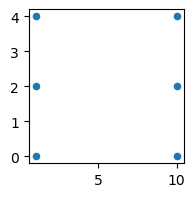

In [4]:
# Visualize X
plt.figure(figsize=(2,2))
plt.scatter(X[:,0],X[:,1], s = 20)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### Using scikit-learn built in k-means clustering function

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> The choice of K could be arbitary, and it is a hyperparameter that needs to be tuned with different 
purposes. Let's start to look at how the value of K will effect the performance.

</div>

In [5]:
# Determines number of clusters K
K = 2

In [6]:
# n_init‘auto’ or int, default=10
# Number of times the k-means algorithm is run with different centroid seeds. 
# The final results is the best output of n_init consecutive runs in terms of inertia. 
n_init = 'auto'

In [7]:
# run k-means clustering
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)

In [8]:
# print cluster labels for each data points

print(kmeans.labels_)

[0 0 0 1 1 1]


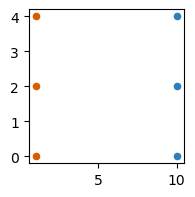

In [9]:
# visualize the clustering results
plt.figure(figsize=(2,2))
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='#2c7fb8')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='#D55E00')

In [10]:
# now play with number of clusters K
K = 3

In [11]:
# run k-means clustering
#kmeans = KMeans(n_clusters=K, n_init = n_init).fit(X)
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)

In [12]:
# print cluster labels for each data points
print(kmeans.labels_)

[2 2 0 1 1 1]


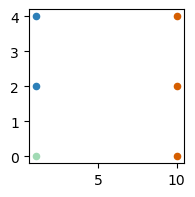

In [13]:
# visualize the clustering results
plt.figure(figsize=(2,2))
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='#2c7fb8')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='#D55E00')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='#a1dab4')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.1:</b>  How about larger K?
</div>

In [14]:
K = 4

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### Now let's try some larger scale 2D dataset. 

</div>

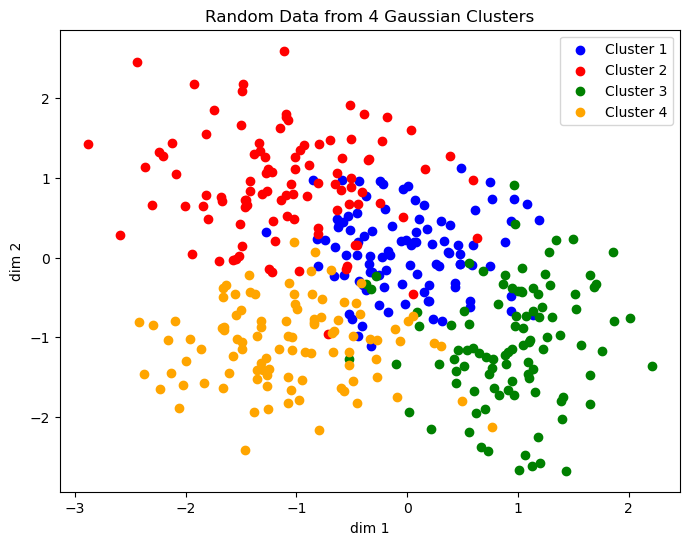

In [15]:
# Set the random seed for reproducibility
np.random.seed(0)

# Number of samples in each cluster
n_samples = 100

# Generate cluster 1 data
# Any notes on data generation we should include? -AA 
cluster_1_mean = [0, 0]  # Mean of cluster 1
cluster_1_cov = [[0.25, 0], [0, 0.25]]  # Covariance matrix of cluster 1
cluster_1_data = np.random.multivariate_normal(cluster_1_mean, cluster_1_cov, n_samples)

# Generate cluster 2 data
cluster_2_mean = [-1, 1]  # Mean of cluster 2
cluster_2_cov = [[0.5, 0], [0, 0.5]]  # Covariance matrix of cluster 2
cluster_2_data = np.random.multivariate_normal(cluster_2_mean, cluster_2_cov, n_samples)

# Generate cluster 3 data
cluster_3_mean = [1, -1]  # Mean of cluster 3
cluster_3_cov = [[0.25, 0], [0, 0.5]]  # Covariance matrix of cluster 3
cluster_3_data = np.random.multivariate_normal(cluster_3_mean, cluster_3_cov, n_samples)

# Generate cluster 4 data
cluster_4_mean = [-1, -1]  # Mean of cluster 4
cluster_4_cov = [[0.5, 0], [0, 0.25]]  # Covariance matrix of cluster 4
cluster_4_data = np.random.multivariate_normal(cluster_4_mean, cluster_4_cov, n_samples)


# Combine data from all clusters
X = np.concatenate((cluster_1_data, cluster_2_data, cluster_3_data, cluster_4_data))

# Create labels for each cluster
labels = np.concatenate((
    np.zeros(n_samples),  # Cluster 1 labeled as 0
    np.ones(n_samples),   # Cluster 2 labeled as 1
    np.full(n_samples, 2),  # Cluster 3 labeled as 2
    np.full(n_samples, 3),  # Cluster 4 labeled as 3
))

# Define colors for each cluster
colors = ['b', 'r', 'g', 'orange', 'purple']

# Plot the generated data with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title('Random Data from 4 Gaussian Clusters')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.legend()
plt.show()

In [16]:
# print shape of X
X.shape

(400, 2)

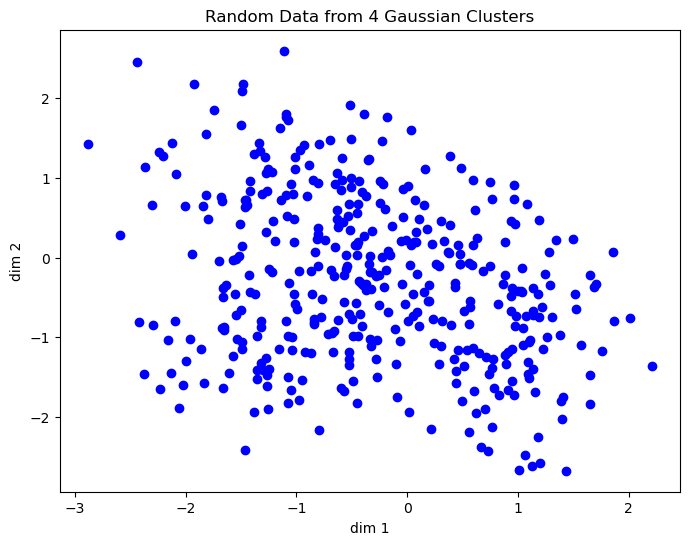

In [17]:
# Plot the generated data with same colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c='b')

plt.title('Random Data from 4 Gaussian Clusters')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.show()

In [18]:
# run k-means clustering when number of clusters K = 3
K = 3
#kmeans = KMeans(n_clusters=K, n_init = n_init).fit(X)
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)

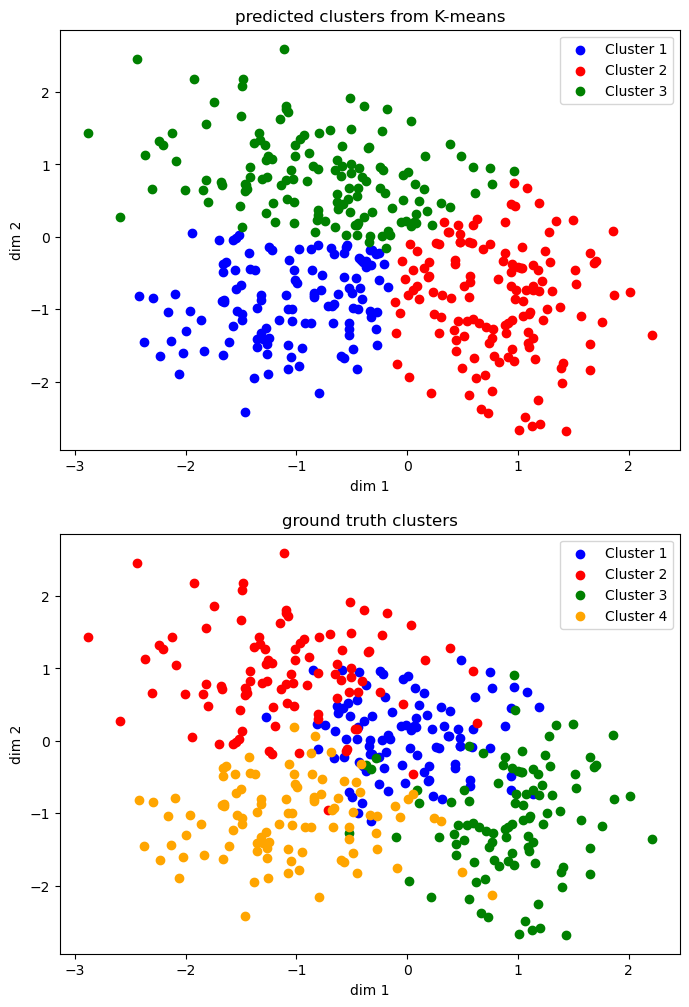

In [26]:
# visualize the clustering results
fig, axes = plt.subplots(2, 1, figsize=(8,12))

# visualize the predicted clusters
for i in range(K):
    axes[0].scatter(X[kmeans.labels_== i,0], X[kmeans.labels_== i,1], c = colors[i], label=f'Cluster {i+1}')
axes[0].set_xlabel('dim 1')
axes[0].set_ylabel('dim 2')
axes[0].legend()
axes[0].set_title('predicted clusters from K-means')

# visualize the ground truth labels
for i in range(4):
    axes[1].scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')
axes[1].set_xlabel('dim 1')
axes[1].set_ylabel('dim 2')
axes[1].legend()
axes[1].set_title('ground truth clusters')

plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p><b> Which K is better? How to evaluate the clustering results? </b> 

The Rand Index computes a similarity measure between two clusterings by considering all pairs 
of samples and counting pairs that are assigned in the same or different clusters in the predicted 
and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling 
independently of the number of clusters and samples and exactly 1.0 when the clusterings are 
identical (up to a permutation). The adjusted Rand index is bounded below by -0.5 for especially 
discordant clusterings.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

</div>

In [19]:
# import adjusted_rand_score

from sklearn.metrics import adjusted_rand_score

In [20]:
# Evaluate the clustering using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.4495


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.2:</b>  run k-means clustering when number of clusters K = 4.
</div>

In [21]:
# run k-means clustering when number of clusters K = 4
K = 4
kmeans = KMeans(n_clusters=K, n_init=10).fit(X)

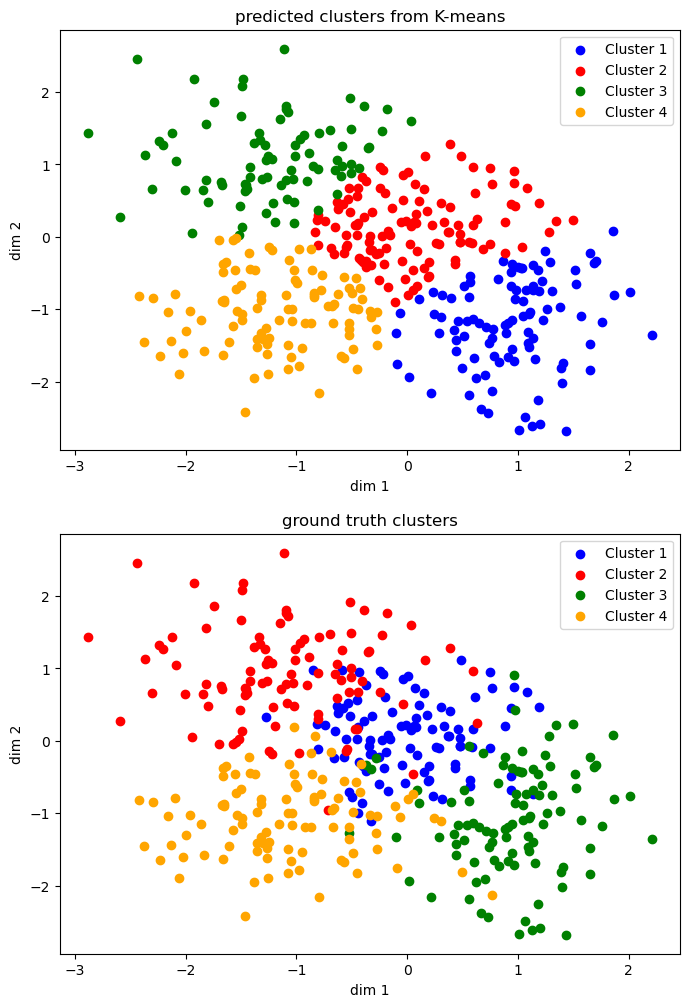

In [22]:
# visualize the clustering results
fig, axes = plt.subplots(2, 1, figsize=(8,12))

# visualize the predicted clusters
for i in range(K):
    axes[0].scatter(X[kmeans.labels_== i,0], X[kmeans.labels_== i,1], c = colors[i], label=f'Cluster {i+1}')
axes[0].set_xlabel('dim 1')
axes[0].set_ylabel('dim 2')
axes[0].legend()
axes[0].set_title('predicted clusters from K-means')

# visualize the ground truth labels
for i in range(4):
    axes[1].scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')
axes[1].set_xlabel('dim 1')
axes[1].set_ylabel('dim 2')
axes[1].legend()
axes[1].set_title('ground truth clusters')

plt.show()

In [23]:
# Evaluate the clustering using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.6126


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.3:</b>  run k-means clustering when number of clusters K = 5.
</div>

In [24]:
# run k-means clustering when number of clusters K = 5
K = 5
kmeans = KMeans(n_clusters=K).fit(X)

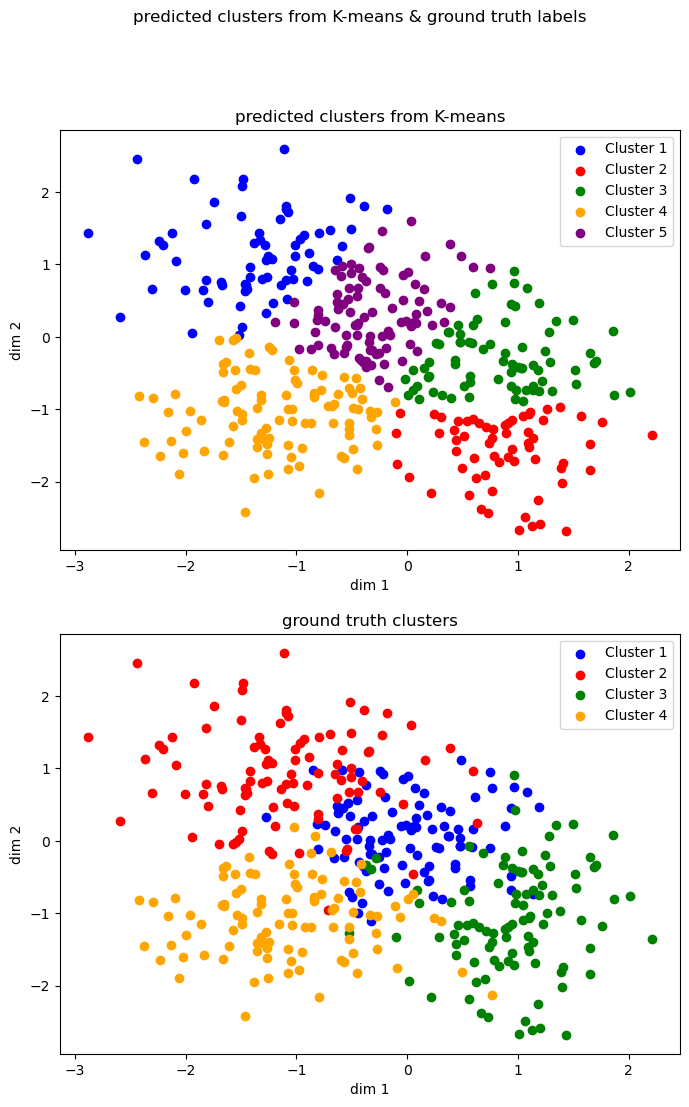

In [25]:
# visualize the clustering results
fig, axes = plt.subplots(2, 1, figsize=(8,12))

fig.suptitle('predicted clusters from K-means & ground truth labels')

# visualize the predicted clusters
for i in range(K):
    axes[0].scatter(X[kmeans.labels_== i,0], X[kmeans.labels_== i,1], c = colors[i], label=f'Cluster {i+1}')
axes[0].set_xlabel('dim 1')
axes[0].set_ylabel('dim 2')
axes[0].legend()
axes[0].set_title('predicted clusters from K-means')

# visualize the ground truth labels
for i in range(4):
    axes[1].scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')
axes[1].set_xlabel('dim 1')
axes[1].set_ylabel('dim 2')
axes[1].legend()
axes[1].set_title('ground truth clusters')

plt.show()

In [26]:
# Evaluate the clustering using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.4895


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

##### Now let's try some larger scale dataset with feature dim is larger than 2 - ie the real structural dataset

</div>

In [27]:
# Relevant imports
import pandas as pd

# dir handling
import os

# visualization
import seaborn as sns

# We will import other sklearn packages as needed

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> For demonstration purposes, we import features from a larger list of excitatory cells. We will be reading a pandas dataframe from a feather file. 

In [28]:
# read structural features of excitatory cells
feat_df = pd.read_feather('../data/dfct_e.feather')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

#### What features does the dataframe consist of? 

</div>

In [29]:
feat_df.columns

Index(['root_id', 'soma_depth', 'tip_len_dist_dendrite_p50',
       'tip_tort_dendrite_p50', 'num_syn_dendrite', 'num_syn_soma',
       'path_length_dendrite', 'radial_extent_dendrite',
       'syn_dist_distribution_dendrite_p50', 'syn_size_distribution_soma_p50',
       'syn_size_distribution_dendrite_p50',
       'syn_size_distribution_dendrite_dyn_range', 'syn_depth_dist_p5',
       'syn_depth_dist_p95', 'syn_depth_extent', 'max_density', 'radius_dist',
       'syn_count_pca0', 'syn_count_pca1', 'syn_count_pca2', 'syn_count_pca3',
       'syn_count_pca4', 'syn_count_pca5', 'branch_svd0', 'branch_svd1',
       'branch_svd2', 'ego_count_pca0', 'ego_count_pca1', 'ego_count_pca2',
       'ego_count_pca3', 'ego_count_pca4', 'pt_root_id',
       'classification_system', 'cell_type', 'umap0_raw', 'umap1_raw',
       'hlabel', 'hlabel_int'],
      dtype='object')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### This dataset has many more dimensions! How can we visualize it?

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Visualization </h2>
<p> Looking at each individual feature in a many-dimensional dataset might not be very informative. Let us try dimensionality reduction techniques to visualize the feature space along with the manually classified cell types. 
<p> We will first try <a href = "https://en.wikipedia.org/wiki/Principal_component_analysis"> PCA (Principal Component Analysis) </a> to reduce dimensionality of our data. 
<p> Another alternative is <a href = "https://umap-learn.readthedocs.io/en/latest/"> UMAP </a> for dimensionality reduction and visualization. 
<p> Note: We can choose to perform clustering on the full dataset or a dataset reduced with either PCA, UMAP or other dimensionality reduction techniques. It would depend on the dataset which of the methods works more reliably and robustly. 

In [30]:
# test k-means for cell-type categorization - visualize on reduced data
from sklearn.decomposition import PCA

reduced_for_kmeans = feat_df.copy()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We need to preprocess the data before applying a dimensionality reduction technique. Which features from feat_df should we remove? 
</div>

In [31]:
# sample list of features that are retained. We are reducing correlated features...
# ... but we encourage you to play around with what features to include
reduced_for_kmeans = feat_df[[
    "tip_len_dist_dendrite_p50",
    "tip_tort_dendrite_p50",
    "num_syn_dendrite",
    "num_syn_soma",
    "path_length_dendrite",
    "radial_extent_dendrite",
    "syn_dist_distribution_dendrite_p50",
    "syn_size_distribution_soma_p50",
    "syn_size_distribution_dendrite_p50",
    "syn_size_distribution_dendrite_dyn_range",
    "syn_depth_dist_p5",
    "syn_depth_dist_p95",
    "syn_depth_extent",
    "max_density",
    "radius_dist",
    "syn_count_pca0",
    "syn_count_pca1",
    "syn_count_pca2",
    "syn_count_pca3",
    "syn_count_pca4",
    "syn_count_pca5",
    "branch_svd0",
    "branch_svd1",
    "branch_svd2",
    "ego_count_pca0",
    "ego_count_pca1",
    "ego_count_pca2",
    "ego_count_pca3",
    "ego_count_pca4",
] ]




<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Now, we need to make sure all features are scaled similarly. The principal components that we get from PCA should explain the variance in the dataset, and we do not want features with high absolute values with relatively low variance to bias the analysis. Here, we will use <a href = "https://en.wikipedia.org/wiki/Standard_score"> z-scoring </a> to normalize the dataset. 

In [32]:
# z-score data
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
reduced_for_kmeans_transformed = pd.DataFrame(std_scaler.fit_transform(reduced_for_kmeans))

#reduced_for_kmeans.apply(zscore)
PCA_model = PCA(n_components=3)
reduced_data = PCA_model.fit_transform(reduced_for_kmeans_transformed)


In [33]:
# reduced data is the 3-dim array of PC0, PC1 and PC2 components
reduced_data.shape

(1188, 3)

In [34]:
# We will append this to the original dataframe as the PC0, PC1 components
feat_df['pc0'] = reduced_data[:,0]
feat_df['pc1'] = reduced_data[:,1]
feat_df['pc2'] = reduced_data[:,2]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

## PCA visualization superimposed with manual cell types

</div>

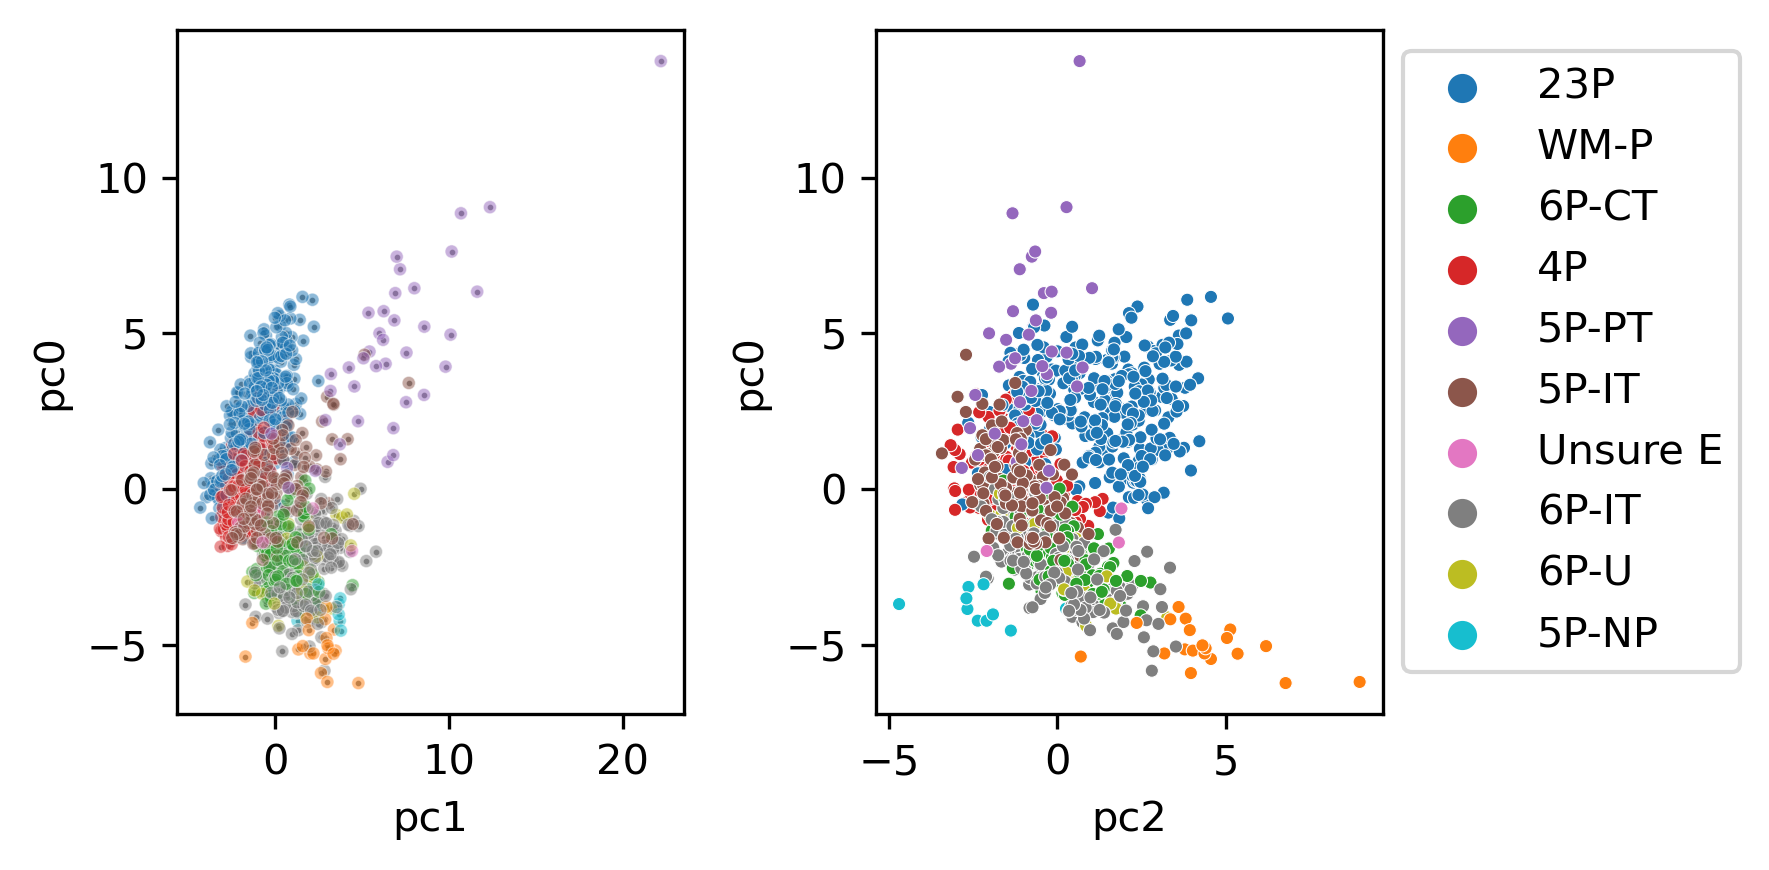

In [35]:
# PCA
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3), dpi=300)

sns.scatterplot(
    x="pc1",
    y="pc0",
    data=feat_df,
    ax=ax0,  
    s=2,
    alpha=0.5,
    color='k',
)

p1 = sns.scatterplot(
    x="pc1",
    y="pc0",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    alpha=0.5,
    hue="cell_type",
    ax=ax0
    
)

p1.get_legend().remove()

#ax0.legend().set_bbox_to_anchor((1,1))

sns.scatterplot(
    x="pc2",
    y="pc0",
    data=feat_df,
    ax=ax1,  
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="pc2",
    y="pc0",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type",
    ax=ax1
    
)

ax1.legend().set_bbox_to_anchor((1,1))
fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<p> <b> Task 1.4: What happens when we use UMAP for visualization? </b> 
<p> Visualize features using UMAP instead of PCA. Note that the feat_df already contains features called "umap0_raw"  and "umap1_raw" that you can use for testing against your UMAP model results. 
</div>

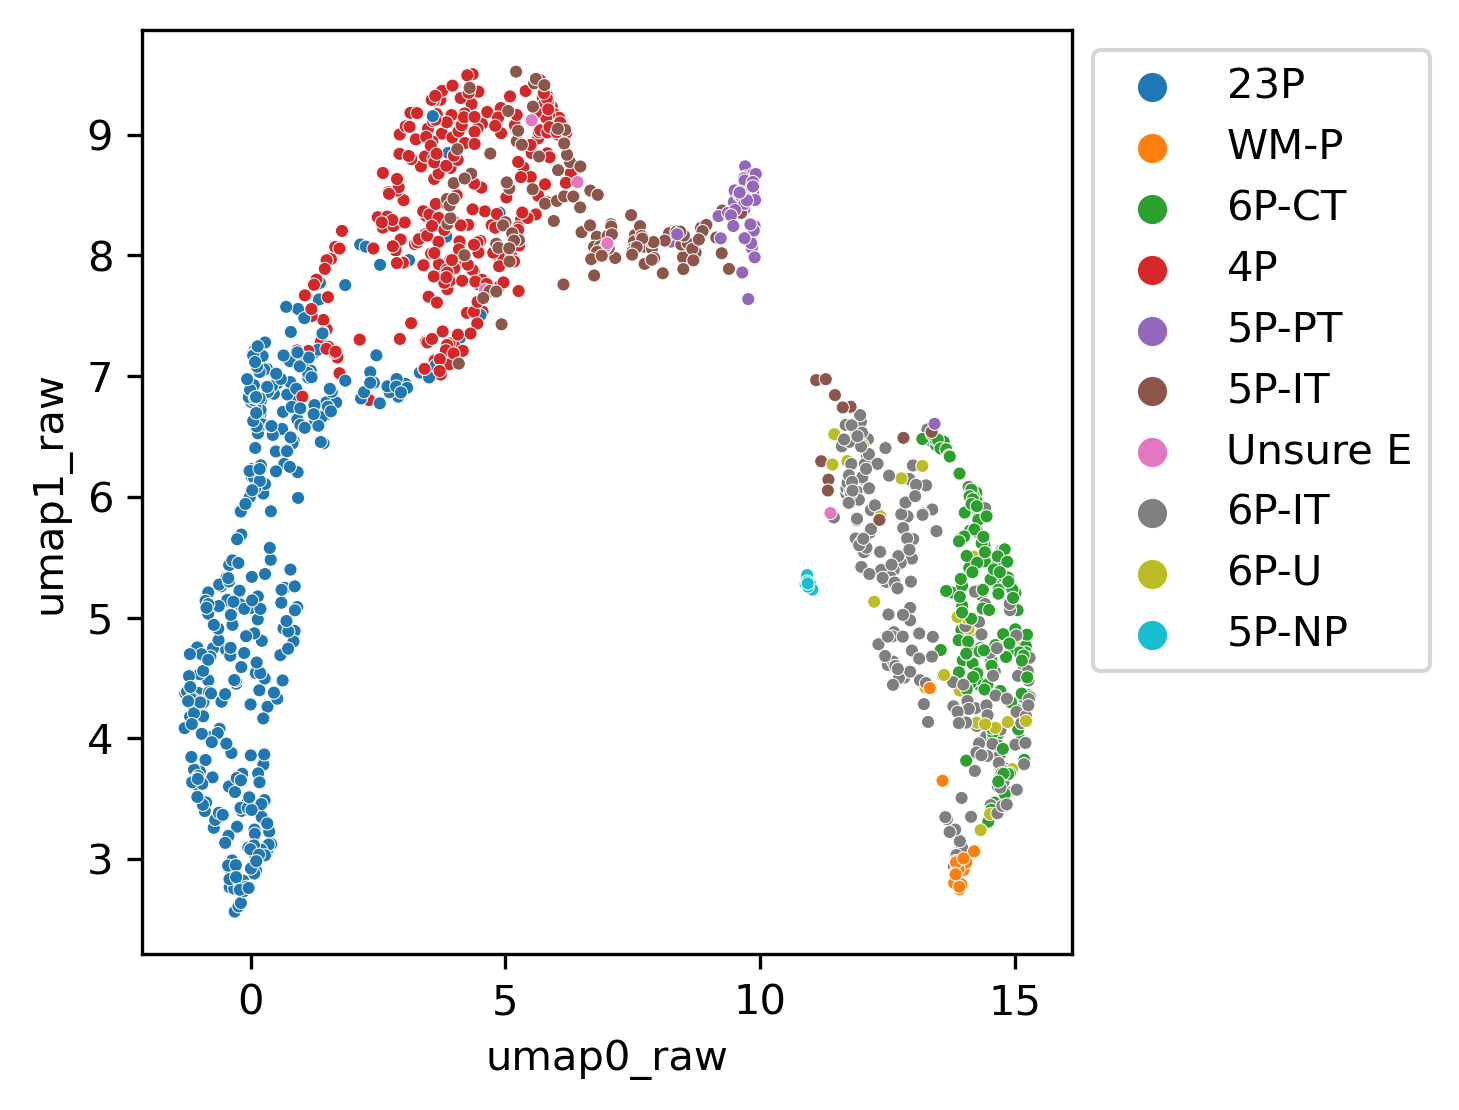

In [37]:
### SOLUTION UMAP EXAMPLE BELOW - COMMENT LATER ###
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0_raw",
    y="umap1_raw",
    data=feat_df,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0_raw",
    y="umap1_raw",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type",
    
)

ax.legend().set_bbox_to_anchor((1,1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We are able to see some clustering in the reduced dataset. We are using the first 3 principal components. It might be instructive to understand which of the structural and positional features contribute the most (have the most variance) to the first principal component. 
</div>

<BarContainer object of 29 artists>

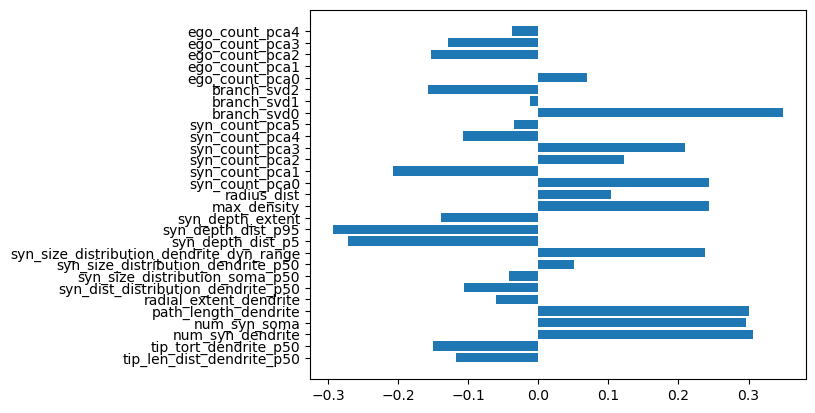

In [38]:
# visualize PC loadings
fig,ax = plt.subplots()
ax.barh(list(reduced_for_kmeans.columns), PCA_model.components_[0,:]) # visualize loadings PC0

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<p> <b> Task 1.5 : What happens when we only use one feature to visualize differences between clusters? </b> <p> For example, we can choose a feature which seems to contribute to PC0 and PC1 the most. Plot such a feature against its manual cell type. 
</div>

<AxesSubplot:xlabel='cell_type', ylabel='syn_depth_dist_p95'>

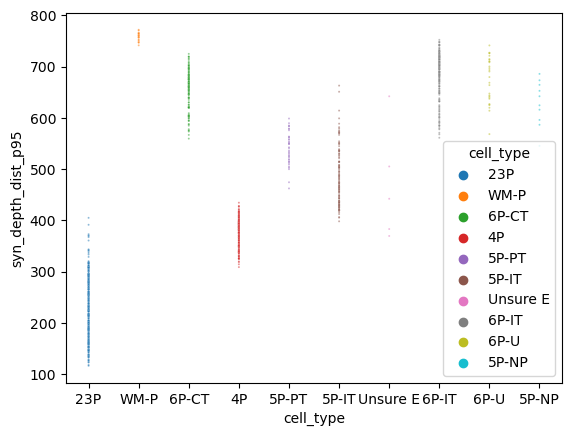

In [39]:
# SOLUTION to comment later
fig, ax = plt.subplots()

sns.scatterplot(
    x="cell_type",
    y="syn_depth_dist_p95",
    data=feat_df,
    ax=ax,  
    s=2,
    alpha=0.5,
    hue="cell_type"
)



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Can we use K-means clustering to divide our feature-space to cell type clusters? </h2>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We will first use a reduced dataset (with lower dimensionality) obtained from PCA, then apply K-means clustering
</div>

In [40]:
# test k-means for cell-type categorization - visualize on reduced data
from sklearn.cluster import KMeans
#reduced_data = feat_df[["pc0", "pc1"]].copy().to_numpy()
reduced_data = feat_df[["pc0", "pc1", "pc2"]].copy().to_numpy()
# also try pca-reduced data?

# how many clusters? 
n_celltypes = 6
# Exercise - play around with number of clusters
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=3)
kmeans.fit(reduced_data)



KMeans(n_clusters=6, n_init=3)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<p> <b> Task 1.6: Play with number of clusters (n_celltypes) and use ARI score to check which is the ideal number of clusters. </b> 
What does it mean when this number is less than the number of cell types? 
</div>

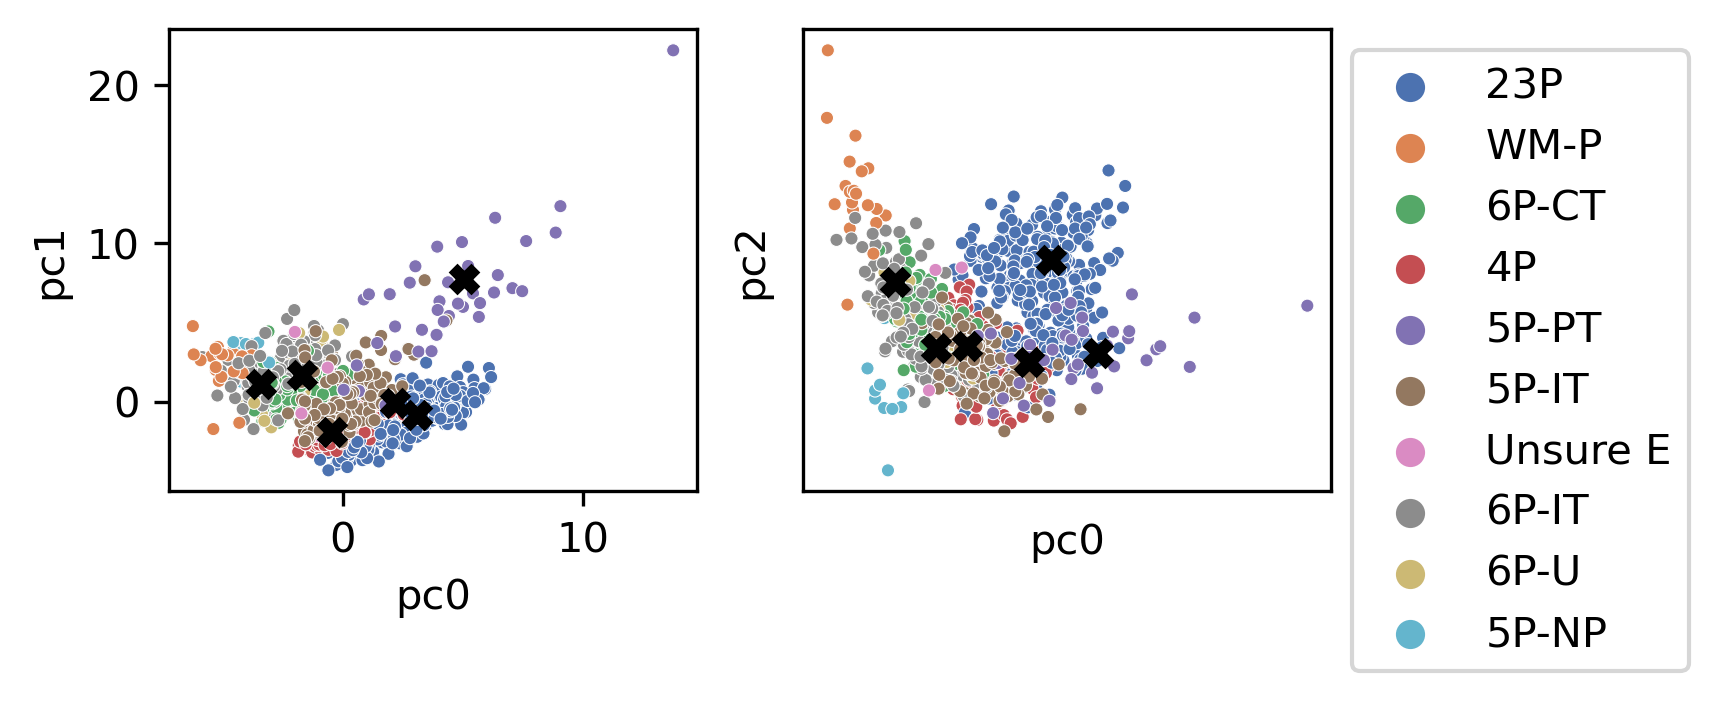

In [41]:

fig, (ax0,ax1) = plt.subplots(1,2,figsize=(5, 2), dpi=300)
#plt.figure(1)
#plt.clf()


#plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
ax0.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=30,
    linewidths=3,
    color="k",
    zorder=10,
)

p1 = sns.scatterplot(
    x="pc0",
    y="pc1",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type", palette='deep', ax = ax0
    
)
p1.get_legend().remove()


# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
ax1.scatter(
    centroids[:, 0],
    centroids[:, 2],
    marker="x",
    s=30,
    linewidths=3,
    color="k",
    zorder=10,
)

sns.scatterplot(
    x="pc0",
    y="pc2",
    data=feat_df.query('cell_type != "Unsure I"'),
    s=10,
    hue="cell_type", palette='deep', ax = ax1
    
)



ax1.legend().set_bbox_to_anchor((1,1))


plt.xticks(())
plt.yticks(())
plt.show()


In [42]:
# let's add ground truth labels to cell types
feat_df['cell_type'] = pd.Categorical(feat_df['cell_type'])
feat_df['type_code'] = feat_df['cell_type'].cat.codes
ground_truth_labels = feat_df['type_code']

In [43]:
ari = adjusted_rand_score(ground_truth_labels, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari:.4f}" + " for "+ str(n_celltypes) + " clusters" )

Adjusted Rand Index (ARI): 0.3462 for 6 clusters


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<b> Further Questions </b>
<li> Can we do better by including/excluding some features from the features dataframe? 
<li> What would happen if we applied k-means clustering to the full dataset instead of the reduced dataset?
<li> What would happen if we applied k-means clustering to a UMAP-reduced dataset? 
<li> When does k-means clustering work well? When does it fail? Look at the different clustering methods and the kinds of data they work on. 
</div>

##### Overview of different clustering methods

<img src="./resources/sphx_glr_plot_cluster_comparison_001.png">